In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
import requests as rq 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn import metrics


# accès aux données : https://odre.opendatasoft.com/explore/dataset/eco2mix-national-cons-def/information

# dates de début et de fin de la plage de données, format AAAA-MM-JJ
date_debut = '2012-01-01'
date_fin = '2022-12-31'

# champs possibles de la requête :
# perimetre ; nature ; date ; heure ; date_heure ;
# consommation ; prevision_j1 ; prevision_j ; fioul ; charbon ;
# gaz ; nucleaire ; eolien ; solaire ; hydraulique ;
# pompage ; bioenergies ; ech_physiques ; taux_co2 ; ech_comm_angleterre ;
# ech_comm_espagne ; ech_comm_italie ; ech_comm_suisse ; ech_comm_allemagne_belgique ; fioul_tac ;
# fioul_cogen ; fioul_autres ; gaz_tac ; gaz_cogen ; gaz_ccg ;
# gaz_autres ; hydraulique_fil_eau_eclusee ; hydraulique_lacs ; hydraulique_step_turbinage ; bioenergies_dechets ;
# bioenergies_biomasse ; bioenergies_biogaz

df_cons = pd.read_csv(r"D:\ENSAE\2A S2\projet_seminaire_stat\data\eco2mix-national-cons-def.csv", sep=';')
# toutes les consommations sont en MW
df_cons = df_cons[["date", "heure","consommation"]]

C:\Users\lisag\AppData\Local\Temp\ipykernel_4740\1614395482.py:27: DtypeWarning: Columns (23,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df_cons = pd.read_csv(r"D:\ENSAE\2A S2\projet_seminaire_stat\data\eco2mix-national-cons-def.csv", sep=';')


In [47]:
mask = (df_cons['date'] > date_debut) & (df_cons['date'] <= date_fin)
df_cons = df_cons.loc[mask]

In [48]:
df_cons.sort_values(["date","heure"], inplace=True)

In [49]:
# ajout d'une colonne avec les dates et les heures
df_cons['date_heure'] = pd.to_datetime(df_cons['date']+'T'+df_cons['heure'])


In [51]:
df_cons.dropna(axis = 0, inplace=True)

In [52]:
df_cons.reset_index(drop=True, inplace=True)

<AxesSubplot:xlabel='date'>

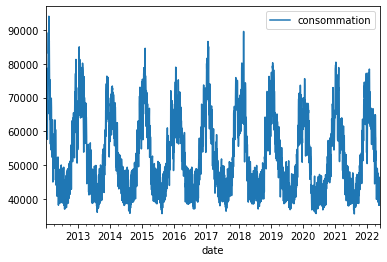

In [53]:
# calcul de la consommation moyenne par jour
cons_moy_quot = df_cons[['date_heure','consommation']] \
    .groupby(df_cons['date_heure'].dt.normalize().rename('date')) \
    .mean()
cons_moy_quot.plot()

<AxesSubplot:xlabel='jour'>

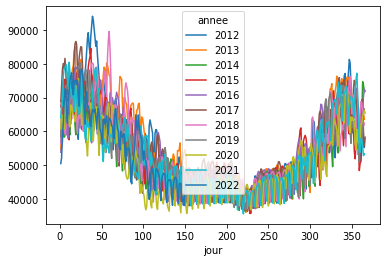

In [54]:
cons_moy_quot_ann = cons_moy_quot \
    .assign(annee=cons_moy_quot.index.year, jour=cons_moy_quot.index.dayofyear) \
    .pivot(index='jour', columns='annee', values='consommation')
cons_moy_quot_ann.plot()

## tendance gaussienne ? centrée au mois de décembre/janvier